In [ ]:
# !git clone https://github.com/Jsrsky/machine_unlearning_experiments
# %cd machine_unlearning_experiments/experiments/mnist/naive

## Dependecies

In [3]:
import sys
from pathlib import Path
from torchvision import datasets

## Utils

In [4]:
project_root = Path.cwd().resolve().parents[2]
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))
    
data_root = project_root / 'data'
data_root.mkdir(parents=True, exist_ok=True)

from notebook_setup import setup_notebook
setup_notebook()

Notebook setup completed. Project root added to sys.path: D:\Machine_unlearning_masters


In [5]:
# Device configuration
from utils.utils import DEVICE

print(f"Device used: {DEVICE}")

# Set random seed for reproducibility
from utils.utils import set_seed
set_seed()

# Prepare Dataloaders
from methods.naive.naive_utils import init_dataloaders

# Train loop
from utils.train_test_metrics import train_model

# Plot losses
from utils.train_test_metrics import plot_training_history

# Test function
from utils.train_test_metrics import test_model

# Merics 
from utils.train_test_metrics import show_metrics

# Init model
from models.simple_cnn import init_model_cnn


Device used: cpu


## Parameters (arbitrary chosen)

In [6]:
BATCH_SIZE = 32
LEARNING_RATE = 0.001
EPOCHS = 10

# Simple base training

## Init model

In [21]:
model, model_name, criterion, optimizer, transform = init_model_cnn()

Init model...
Done initializing model.
Model ID: 2102574239952, Optimizer ID: 2102556445200, Criterion ID: 2102549309264


## Init dataloaders

In [22]:
dataset = datasets.MNIST(root=data_root, train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root=data_root, train=False, transform=transform, download=True)
mnist_data_split_path = 'mnist_data_splits.json'

train_loader, val_loader, test_loader, classes = init_dataloaders(
    datasets=(dataset, test_dataset), 
    info_file_path = mnist_data_split_path, 
    val_ratio=0.2
    )

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 9385866.93it/s] 


Extracting d:\Machine_unlearning_masters\data\MNIST\raw\train-images-idx3-ubyte.gz to d:\Machine_unlearning_masters\data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 279371.99it/s]


Extracting d:\Machine_unlearning_masters\data\MNIST\raw\train-labels-idx1-ubyte.gz to d:\Machine_unlearning_masters\data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 2671671.45it/s]


Extracting d:\Machine_unlearning_masters\data\MNIST\raw\t10k-images-idx3-ubyte.gz to d:\Machine_unlearning_masters\data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4543412.54it/s]


Extracting d:\Machine_unlearning_masters\data\MNIST\raw\t10k-labels-idx1-ubyte.gz to d:\Machine_unlearning_masters\data\MNIST\raw

Prepare DataLoaders...
Done preparing DataLoaders.


## Call train

In [23]:
train_model(model, model_name, train_loader, val_loader, criterion, optimizer, num_epochs=EPOCHS)

Evaluating on validation set...): 100%|██████████| 375/375 [00:06<00:00, 53.72it/s]


Epoch [1/10], Train Loss: 0.1485, Train Accuracy: 0.9549, Val Loss: 0.0590, Val Accuracy: 0.9822
Epoch 1: New best validation accuracy: 0.9822. Model saved to CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 375/375 [00:06<00:00, 61.03it/s]


Epoch [2/10], Train Loss: 0.0468, Train Accuracy: 0.9854, Val Loss: 0.0491, Val Accuracy: 0.9852
Epoch 2: New best validation accuracy: 0.9852. Model saved to CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 375/375 [00:06<00:00, 61.06it/s]


Epoch [3/10], Train Loss: 0.0316, Train Accuracy: 0.9904, Val Loss: 0.0375, Val Accuracy: 0.9888
Epoch 3: New best validation accuracy: 0.9888. Model saved to CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 375/375 [00:06<00:00, 60.81it/s]


Epoch [4/10], Train Loss: 0.0242, Train Accuracy: 0.9921, Val Loss: 0.0514, Val Accuracy: 0.9848


Evaluating on validation set...): 100%|██████████| 375/375 [00:06<00:00, 61.26it/s]


Epoch [5/10], Train Loss: 0.0185, Train Accuracy: 0.9939, Val Loss: 0.0379, Val Accuracy: 0.9893
Epoch 5: New best validation accuracy: 0.9893. Model saved to CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 375/375 [00:06<00:00, 61.11it/s]


Epoch [6/10], Train Loss: 0.0141, Train Accuracy: 0.9954, Val Loss: 0.0511, Val Accuracy: 0.9875


Evaluating on validation set...): 100%|██████████| 375/375 [00:06<00:00, 61.15it/s]


Epoch [7/10], Train Loss: 0.0113, Train Accuracy: 0.9963, Val Loss: 0.0424, Val Accuracy: 0.9882


Evaluating on validation set...): 100%|██████████| 375/375 [00:05<00:00, 63.03it/s]


Epoch [8/10], Train Loss: 0.0088, Train Accuracy: 0.9971, Val Loss: 0.0420, Val Accuracy: 0.9898
Epoch 8: New best validation accuracy: 0.9898. Model saved to CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 375/375 [00:05<00:00, 62.61it/s]


Epoch [9/10], Train Loss: 0.0080, Train Accuracy: 0.9972, Val Loss: 0.0502, Val Accuracy: 0.9890


Evaluating on validation set...): 100%|██████████| 375/375 [00:05<00:00, 62.66it/s]

Epoch [10/10], Train Loss: 0.0085, Train Accuracy: 0.9971, Val Loss: 0.0440, Val Accuracy: 0.9900
Epoch 10: New best validation accuracy: 0.9900. Model saved to CNN_MNIST_model.pth.
Training complete for CNN_MNIST. Training stats saved to 'CNN_MNIST_history.json'.


## Plot history losses

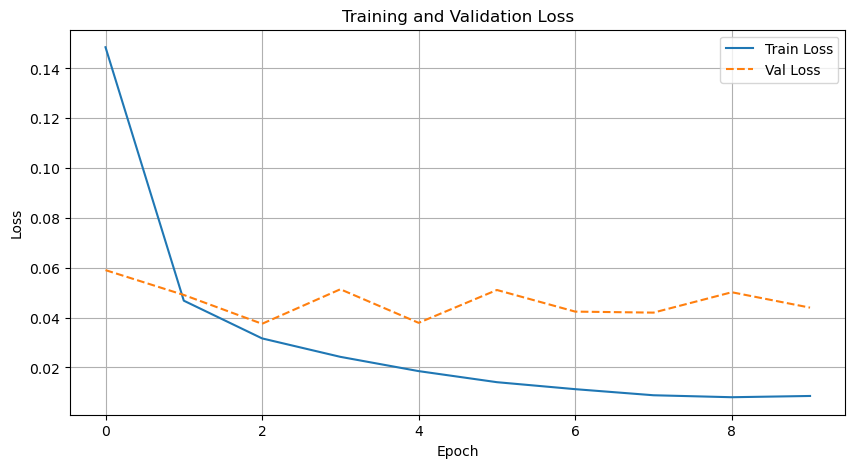

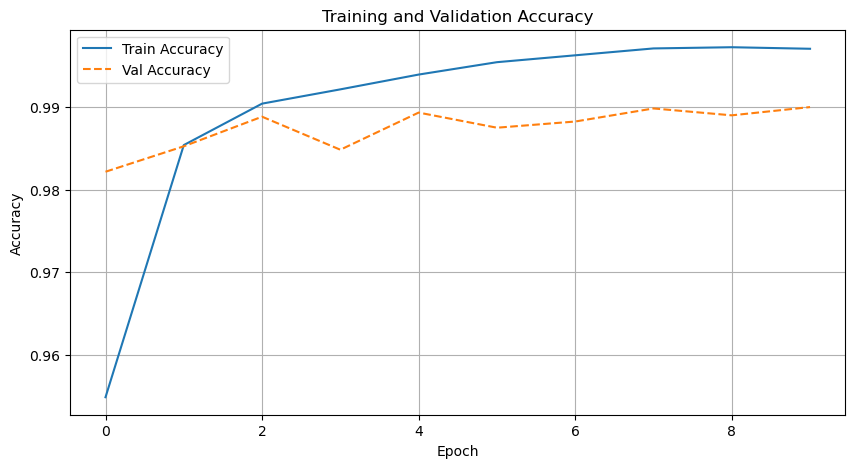

In [24]:
history_path = f'{model_name}_history.json'
plot_training_history(history_path)

## Call test

In [25]:
model_path = f"{model_name}_model.pth"
test_model(model, model_name, model_path, test_loader)

Loading and testing model: CNN_MNIST


Evaluating model: CNN_MNIST_model.pth: 100%|██████████| 313/313 [00:05<00:00, 60.31it/s]

Predictions and labels saved to CNN_MNIST_predictions.json


## Show metrics

Metrics for CNN_MNIST:
  - Test Accuracy: 0.9913
  - Precision: 0.9913
  - Recall: 0.9913
  - F1 Score: 0.9913


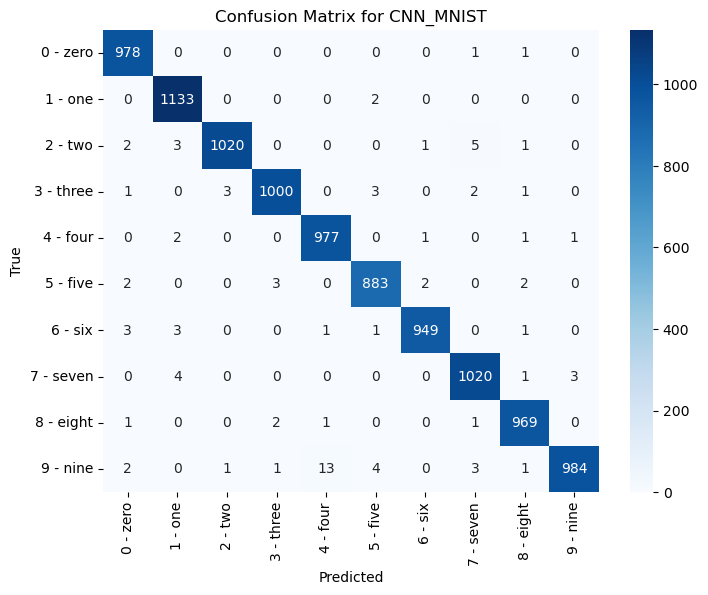

In [26]:
predictions_path = f'{model_name}_predictions.json'
# classes = ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']
show_metrics(predictions_path, classes, model_name)

## Utils naive

In [7]:
# Select samples to unlearn (10% random)
from utils.utils import select_samples_to_unlearn

# Update data splits
from methods.naive.naive_utils import update_splits_after_unlearning

# Recreate Dataloaders from json files
from methods.naive.naive_utils import recreate_dataloaders

# Naive unlearning

### Init new model

In [8]:
data_splits_file = "mnist_data_splits.json"
unlearn_samples_file = "mnist_samples_to_unlearn.json"
updated_data_splits_path = "updated_mnist_data_splits.json"

In [9]:
model, model_name, criterion, optimizer, transform = init_model_cnn()
model_name = "naive_unlearning_" + model_name

Init model...
Done initializing model.
Model ID: 2165017707392, Optimizer ID: 2165035431264, Criterion ID: 2165017410448


### Init data

In [10]:
dataset = datasets.MNIST(root=data_root, train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root=data_root, train=False, transform=transform, download=True)
mnist_data_split_path = 'mnist_data_splits.json'

## Select samples to unlearn

In [31]:
#ONLY ONCE
select_samples_to_unlearn(data_splits_file, unlearn_samples_file, unlearn_ratio=0.1)

Unlearn indices saved to mnist_samples_to_unlearn.json


## Update data splits -> delete samples

In [11]:
update_splits_after_unlearning(data_splits_file, unlearn_samples_file, updated_data_splits_path)

Updated splits saved to updated_mnist_data_splits.json


## Recreate DataLoaders from json files

In [34]:
train_loader, val_loader, test_loader, classes = recreate_dataloaders(
    data_splits_file=updated_data_splits_path,
    dataset=dataset, 
    batch_size=BATCH_SIZE)

Recreating DataLoaders...
Done recreating DataLoaders.


## Re-train

In [35]:
train_model(model, model_name, train_loader, val_loader, criterion, optimizer, num_epochs=EPOCHS)

Evaluating on validation set...): 100%|██████████| 338/338 [00:05<00:00, 61.83it/s]


Epoch [1/10], Train Loss: 0.1540, Train Accuracy: 0.9526, Val Loss: 0.0650, Val Accuracy: 0.9814
Epoch 1: New best validation accuracy: 0.9814. Model saved to naive_unlearning_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 338/338 [00:05<00:00, 61.43it/s]


Epoch [2/10], Train Loss: 0.0485, Train Accuracy: 0.9847, Val Loss: 0.0649, Val Accuracy: 0.9804


Evaluating on validation set...): 100%|██████████| 338/338 [00:05<00:00, 62.09it/s]


Epoch [3/10], Train Loss: 0.0336, Train Accuracy: 0.9891, Val Loss: 0.0378, Val Accuracy: 0.9900
Epoch 3: New best validation accuracy: 0.9900. Model saved to naive_unlearning_CNN_MNIST_model.pth.


Evaluating on validation set...): 100%|██████████| 338/338 [00:05<00:00, 60.76it/s]


Epoch [4/10], Train Loss: 0.0235, Train Accuracy: 0.9926, Val Loss: 0.0424, Val Accuracy: 0.9880


Evaluating on validation set...): 100%|██████████| 338/338 [00:05<00:00, 62.52it/s]


Epoch [5/10], Train Loss: 0.0171, Train Accuracy: 0.9941, Val Loss: 0.0422, Val Accuracy: 0.9878


Evaluating on validation set...): 100%|██████████| 338/338 [00:05<00:00, 62.17it/s]


Epoch [6/10], Train Loss: 0.0143, Train Accuracy: 0.9956, Val Loss: 0.0621, Val Accuracy: 0.9842


Evaluating on validation set...): 100%|██████████| 338/338 [00:05<00:00, 63.08it/s]


Epoch [7/10], Train Loss: 0.0123, Train Accuracy: 0.9960, Val Loss: 0.0639, Val Accuracy: 0.9830


Evaluating on validation set...): 100%|██████████| 338/338 [00:05<00:00, 63.23it/s]


Epoch [8/10], Train Loss: 0.0088, Train Accuracy: 0.9972, Val Loss: 0.0505, Val Accuracy: 0.9863


Evaluating on validation set...): 100%|██████████| 338/338 [00:05<00:00, 61.59it/s]


Epoch [9/10], Train Loss: 0.0093, Train Accuracy: 0.9969, Val Loss: 0.0576, Val Accuracy: 0.9868


Evaluating on validation set...): 100%|██████████| 338/338 [00:05<00:00, 62.21it/s]

Epoch [10/10], Train Loss: 0.0069, Train Accuracy: 0.9975, Val Loss: 0.0566, Val Accuracy: 0.9892
Training complete for naive_unlearning_CNN_MNIST. Training stats saved to 'naive_unlearning_CNN_MNIST_history.json'.


## Plot history losses

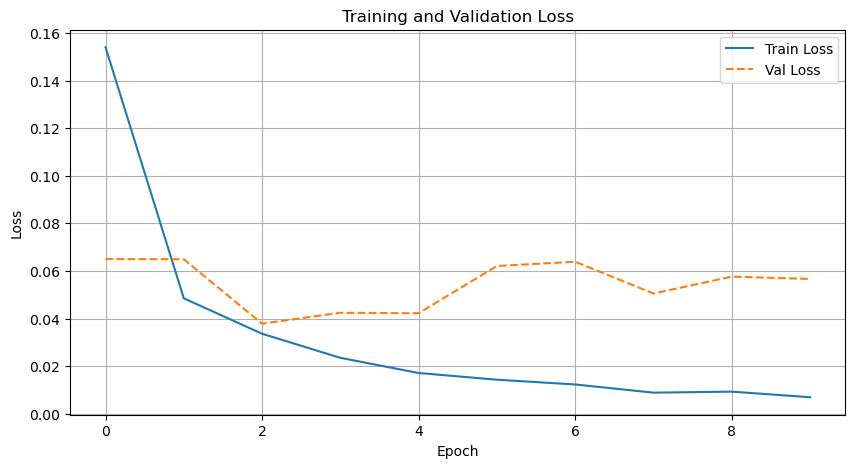

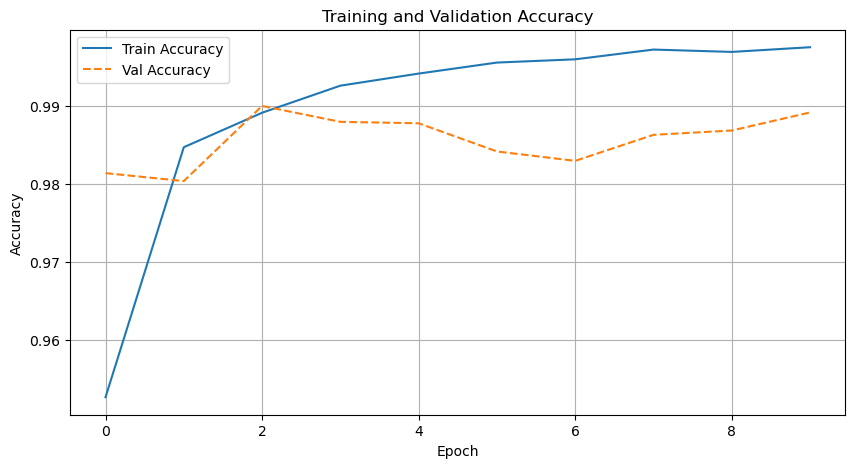

In [36]:
history_path = f'{model_name}_history.json'
plot_training_history(history_path)

## Re-test

In [37]:
model_path = f"{model_name}_model.pth"
test_model(model, model_name, model_path, test_loader)

Loading and testing model: naive_unlearning_CNN_MNIST


Evaluating model: naive_unlearning_CNN_MNIST_model.pth: 100%|██████████| 313/313 [00:05<00:00, 60.46it/s]

Predictions and labels saved to naive_unlearning_CNN_MNIST_predictions.json


## Show metrics

Metrics for naive_unlearning_CNN_MNIST:
  - Test Accuracy: 0.9929
  - Precision: 0.9929
  - Recall: 0.9929
  - F1 Score: 0.9929


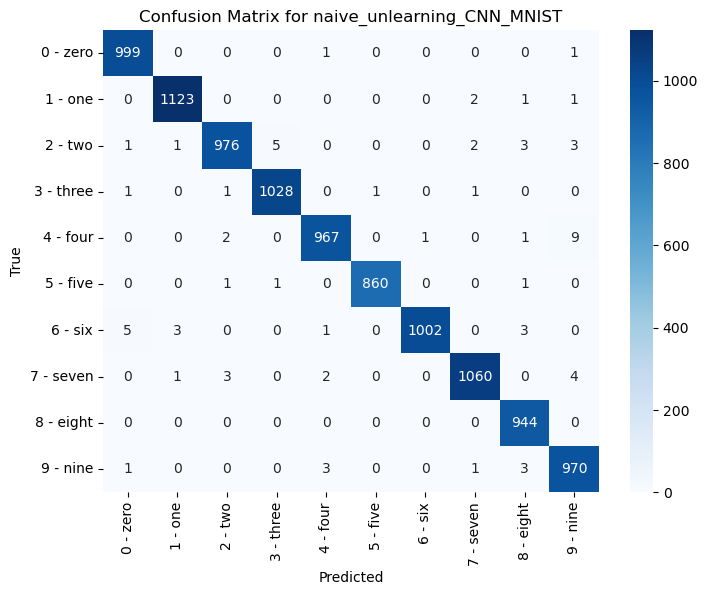

In [38]:
predictions_path = f'{model_name}_predictions.json'
# classes = ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']
show_metrics(predictions_path, classes, model_name)